In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/3561a457-ec26-442a-925a-cdbe7f37a430___RS_HL 5786.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/76c0783e-5e1a-4a25-8371-9e7ef2a8c9d7___RS_HL 7465.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/45c79d4a-ac12-4bf8-a4d6-f59898aa4570___RS_HL 6317.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/686f612d-bb49-409a-8afa-0707481774fe___RS_HL 8184.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/ca4458ac-56ef-41f3-b7a9-6084846069fd___RS_HL 6072.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/20102c8b-dde0-47d2-8035-7ceeb42f1961___RS_HL 6207.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/041482f6-6dd6-4ac9-9e59-e973c9bcaf6d___RS_HL 8155.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/healthy/94b7e2c6-9081-4546-b411-c89c0dd219e7___RS_HL 7416.JPG
/kaggle/input/apple-disease-dataset/apple_disease/apple/

In [4]:
print(filename)

fb8255a6-e05d-44d3-a115-80c1e55009bd___JR_FrgE.S 3074.JPG


In [5]:
apple_train ='/kaggle/input/apple-disease-dataset/apple_disease/apple' 
apple_test = '/kaggle/input/apple-disease-dataset/apple_disease/apple_test'

/kaggle/input/apple-disease-dataset/apple_disease/apple


#### Above is the number of images in the different categories.
* This data will be used to train the Leaf disease classifier model

In [7]:
#import relevant libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
from PIL import Image


In [10]:
#import the images using image generator


# Set image size and batch size
IMG_SIZE = (150, 150)  # Resize all images to 150x150 pixels
BATCH_SIZE = 32  # Number of images per batch

# Apply data augmentation to training images
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescale test images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    apple_train,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Multi-class classification
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    apple_test,  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"  
)
 

Found 2286 images belonging to 4 classes.
Found 316 images belonging to 4 classes.


#### Data Visualization
* In this section we visualize the Images

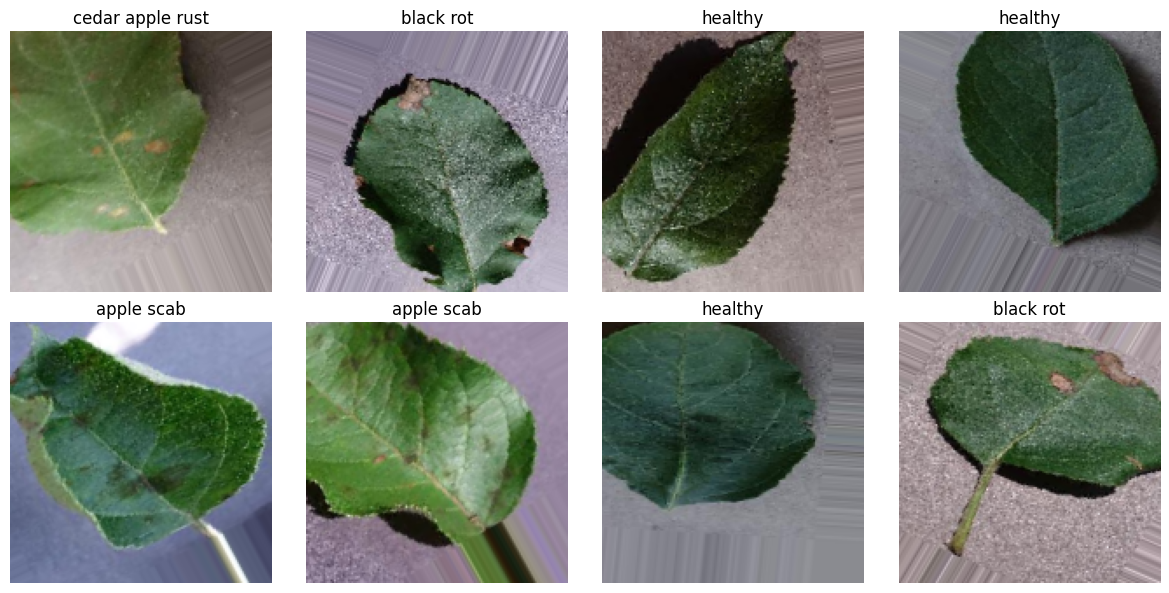

In [11]:

def show_images(generator):
    class_labels = list(generator.class_indices.keys())  # Get class labels
    images, labels = next(generator)  # Get first batch

    plt.figure(figsize=(12, 6))
    for i in range(8):  # Show 8 images
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i])
        plt.title(class_labels[np.argmax(labels[i])])  # Convert one-hot back to label
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

show_images(train_generator)

* In this project there are 4 distinct classes.
* We are considering apple leaf as a case study.
* The 4 classes are healthy, black rot, cedar apple rust and apple scab

##### CNN model architecture
This consists of
* Convolutional layers to extract features from images

* MaxPooling layers to reduce spatial dimensions

* Dropout layers to prevent overfitting

* Dense layers for classification

In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(4, activation='softmax') 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,836,868 (18.45 MB)

 Trainable params: 4,836,868 (18.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
EPOCHS = 20

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=EPOCHS
)


Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 71s 943ms/step - accuracy: 0.5998 - loss: 1.0114 - val_accuracy: 0.7975 - val_loss: 0.6293
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 69s 921ms/step - accuracy: 0.7217 - loss: 0.7494 - val_accuracy: 0.7500 - val_loss: 0.6869
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 913ms/step - accuracy: 0.7459 - loss: 0.6767 - val_accuracy: 0.7911 - val_loss: 0.6687
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 901ms/step - accuracy: 0.8105 - loss: 0.5109 - val_accuracy: 0.8608 - val_loss: 0.3621
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 907ms/step - accuracy: 0.8570 - loss: 0.4227 - val_accuracy: 0.8481 - val_loss: 0.4418
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 904ms/step - accuracy: 0.8655 - loss: 0.3636 - val_accuracy: 0.8196 - val_loss: 0.4513
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 899ms/step - accuracy: 0.8740 - loss: 0.3887 - val_accuracy: 0.8070 - val_loss: 0.5141
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 882ms/step - accuracy: 0.8674 - loss: 0.3682 - val_accu

#### Model evaluation

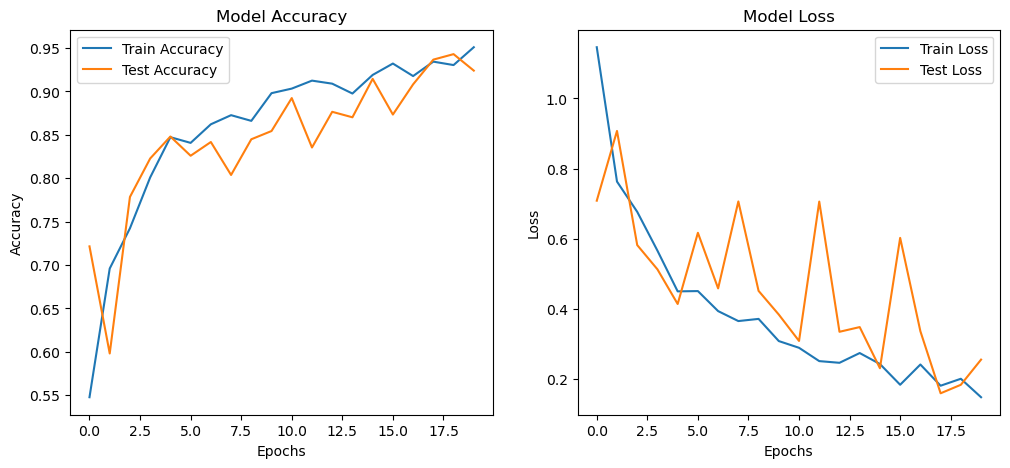

In [10]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


#### Evaluating Model performance

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [12]:
# Get the true labels
true_labels = []
predicted_labels = []

# Iterate through the test set
for images, labels in test_generator:
    preds = model.predict(images)  # Get model predictions
    true_labels.extend(np.argmax(labels, axis=1))  # Convert one-hot to class index
    predicted_labels.extend(np.argmax(preds, axis=1))  # Get predicted class index
    
    if len(true_labels) >= test_generator.samples:  # Stop when we have processed all test images
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


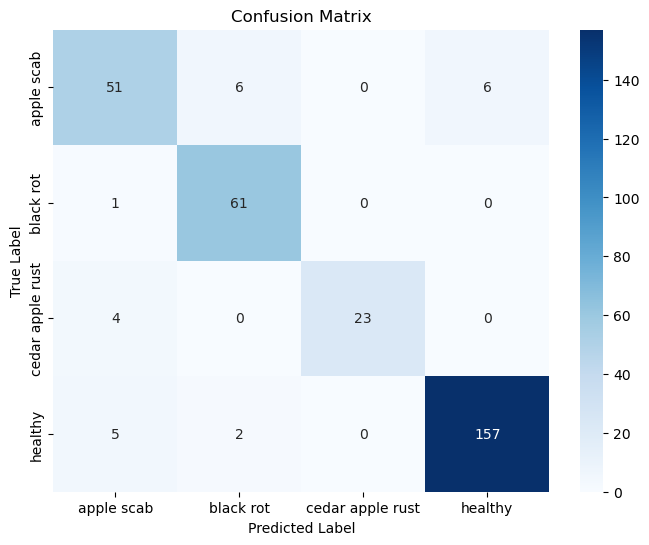

In [13]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# Generate classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))


Classification Report:
                   precision    recall  f1-score   support

      apple scab       0.84      0.81      0.82        63
       black rot       0.88      0.98      0.93        62
cedar apple rust       1.00      0.85      0.92        27
         healthy       0.96      0.96      0.96       164

        accuracy                           0.92       316
       macro avg       0.92      0.90      0.91       316
    weighted avg       0.93      0.92      0.92       316



#### Resnet Model

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [23]:
# Load Pretrained ResNet50
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(150,150,3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Define the ResNet model
resnet_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

# Compile ResNet Model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

# Train ResNet Model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 269s 3s/step - accuracy: 0.4512 - loss: 1.3598 - val_accuracy: 0.5190 - val_loss: 1.1752
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 181s 3s/step - accuracy: 0.5220 - loss: 1.2031 - val_accuracy: 0.5222 - val_loss: 1.1720
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.5168 - loss: 1.1997 - val_accuracy: 0.5190 - val_loss: 1.1456
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.5135 - loss: 1.1813 - val_accuracy: 0.5348 - val_loss: 1.1451
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.5453 - loss: 1.1591 - val_accuracy: 0.5380 - val_loss: 1.1469
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.5265 - loss: 1.1867 - val_accuracy: 0.5348 - val_loss: 1.1105
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.5069 - loss: 1.1995 - val_accuracy: 0.5316 - val_loss: 1.1726
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.5121 - loss: 1.1893 - val_accuracy: 0.5443 - v

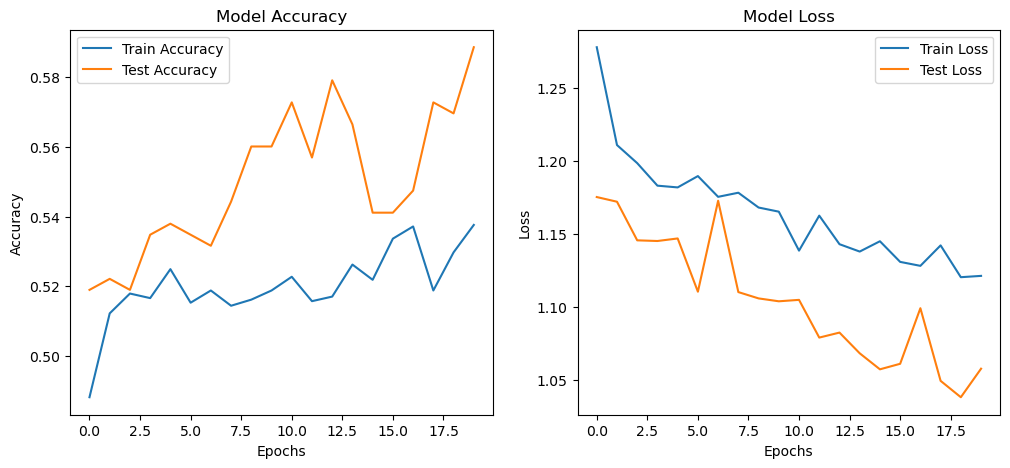

In [24]:
# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [25]:
# Get the true labels
true_labels = []
predicted_labels = []

# Iterate through the test set
for images, labels in test_generator:
    preds = resnet_model.predict(images)  # Get model predictions
    true_labels.extend(np.argmax(labels, axis=1))  # Convert one-hot to class index
    predicted_labels.extend(np.argmax(preds, axis=1))  # Get predicted class index
    
    if len(true_labels) >= test_generator.samples:  # Stop when we have processed all test images
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


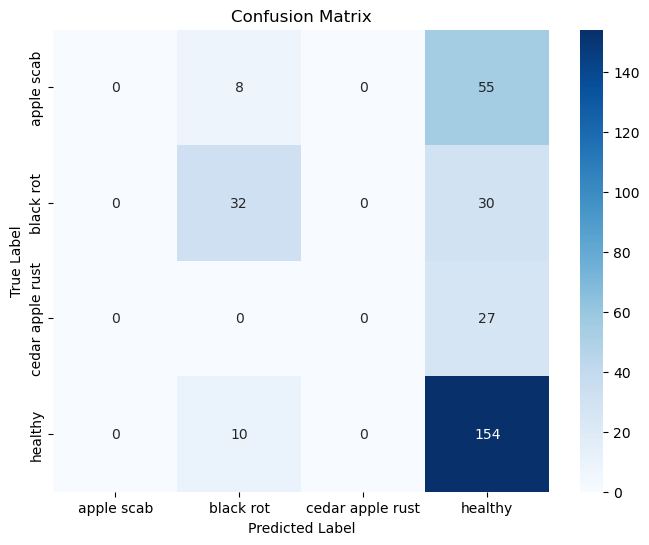

In [26]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [27]:
# Generate classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_labels))


c:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                   precision    recall  f1-score   support

      apple scab       0.00      0.00      0.00        63
       black rot       0.64      0.52      0.57        62
cedar apple rust       0.00      0.00      0.00        27
         healthy       0.58      0.94      0.72       164

        accuracy                           0.59       316
       macro avg       0.30      0.36      0.32       316
    weighted avg       0.43      0.59      0.48       316



c:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Public\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
